In [2]:
import sklearn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("C:/Users/lenov/Downloads/Housing.csv")

# Display dataset info
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

# Convert binary categorical columns to numerical (1/0)
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# One-hot encode furnishingstatus
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

# Check for missing values
print("\nMissing values summary:")
print(df.isnull().sum())

# Display preprocessed data
print("\nPreprocessed data:")
display(df.head())
print("\nData types after preprocessing:")
print(df.dtypes)

Dataset shape: (545, 13)

First 5 rows:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished



Missing values summary:
price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
mainroad                           0
guestroom                          0
basement                           0
hotwaterheating                    0
airconditioning                    0
parking                            0
prefarea                           0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64

Preprocessed data:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False



Data types after preprocessing:
price                              int64
area                               int64
bedrooms                           int64
bathrooms                          int64
stories                            int64
mainroad                           int64
guestroom                          int64
basement                           int64
hotwaterheating                    int64
airconditioning                    int64
parking                            int64
prefarea                           int64
furnishingstatus_semi-furnished     bool
furnishingstatus_unfurnished        bool
dtype: object


In [4]:
# Separate features and target
X = df.drop('price', axis=1)
y = df['price']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (436, 13)
Testing set shape: (109, 13)


In [5]:
# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Show model coefficients
print("Model intercept (bias):", model.intercept_)
print("\nFeature coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature:25}: {coef:>10.2f}")

Model intercept (bias): 260032.35760741588

Feature coefficients:
area                     :     235.97
bedrooms                 :   76778.70
bathrooms                : 1094444.79
stories                  :  407476.59
mainroad                 :  367919.95
guestroom                :  231610.04
basement                 :  390251.18
hotwaterheating          :  684649.89
airconditioning          :  791426.74
parking                  :  224841.91
prefarea                 :  629890.57
furnishingstatus_semi-furnished: -126881.82
furnishingstatus_unfurnished: -413645.06


In [6]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"- MAE  (Mean Absolute Error): {mae:,.2f}")
print(f"- MSE  (Mean Squared Error): {mse:,.2f}")
print(f"- RMSE (Root Mean Squared Error): {rmse:,.2f}")
print(f"- R²   (Coefficient of Determination): {r2:.4f}")

# Interpretation
print("\nInterpretation:")
print(f"On average, predictions are ₹{mae:,.2f} away from actual prices")
print(f"R² value of {r2:.4f} means the model explains {r2*100:.1f}% of price variation")

Model Performance Metrics:
- MAE  (Mean Absolute Error): 970,043.40
- MSE  (Mean Squared Error): 1,754,318,687,330.66
- RMSE (Root Mean Squared Error): 1,324,506.96
- R²   (Coefficient of Determination): 0.6529

Interpretation:
On average, predictions are ₹970,043.40 away from actual prices
R² value of 0.6529 means the model explains 65.3% of price variation


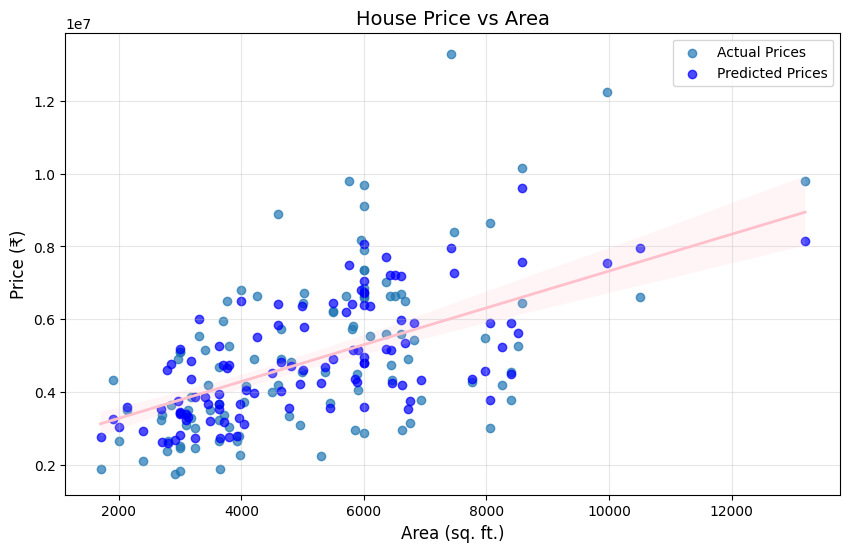

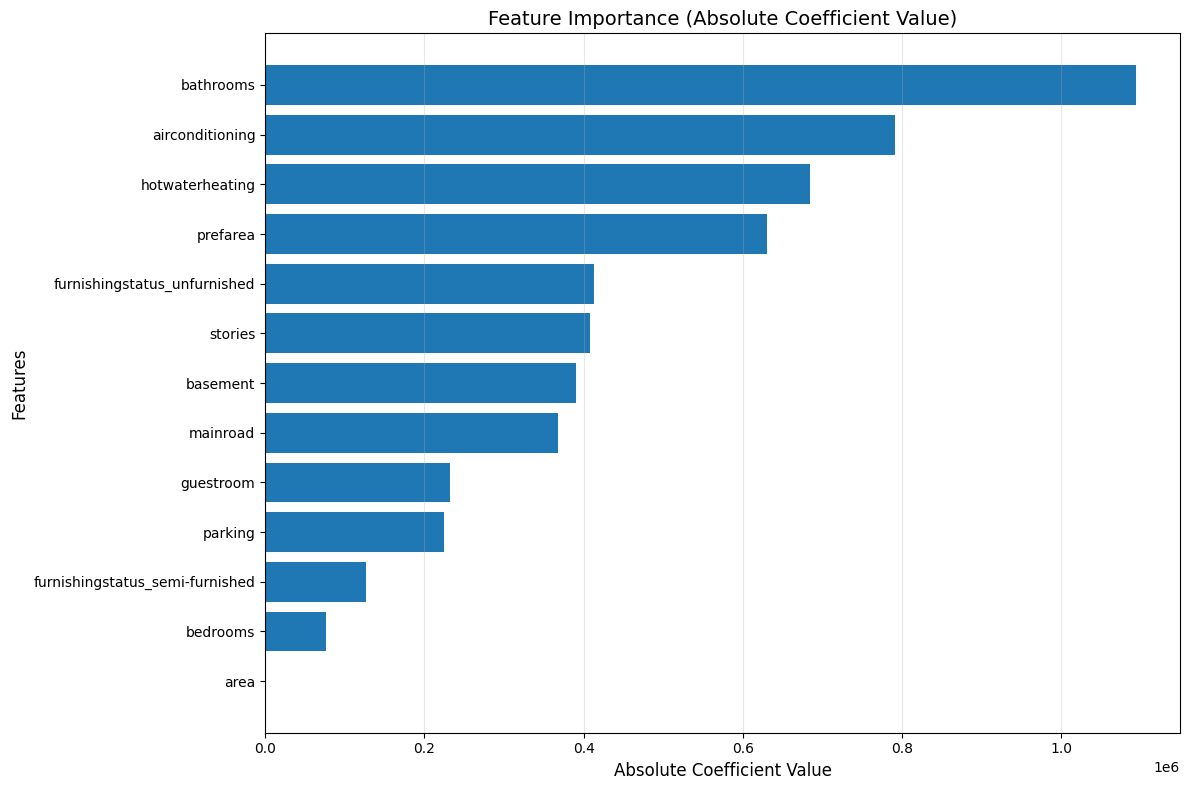


Top 5 Most Influential Features:

bathrooms:
Coefficient: 1094444.79
- For each unit increase in bathrooms, price increases by ₹1094444.79

airconditioning:
Coefficient: 791426.74
- For each unit increase in airconditioning, price increases by ₹791426.74

hotwaterheating:
Coefficient: 684649.89
- For each unit increase in hotwaterheating, price increases by ₹684649.89

prefarea:
Coefficient: 629890.57
- For each unit increase in prefarea, price increases by ₹629890.57

furnishingstatus_unfurnished:
Coefficient: -413645.06
- For each unit increase in furnishingstatus_unfurnished, price decreases by ₹413645.06


In [9]:
# Simple regression plot for 'area'
plt.figure(figsize=(10, 6))
plt.scatter(X_test['area'], y_test, alpha=0.7, label='Actual Prices')
plt.scatter(X_test['area'], y_pred, alpha=0.7, label='Predicted Prices', color='blue')

# Add regression line
sns.regplot(
    x=X_test['area'], 
    y=y_pred, 
    scatter=False, 
    color='pink',
    line_kws={'lw': 2}
)

plt.title('House Price vs Area', fontsize=14)
plt.xlabel('Area (sq. ft.)', fontsize=12)
plt.ylabel('Price (₹)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Feature importance visualization
features = X.columns
coefs = model.coef_
sorted_idx = np.argsort(np.abs(coefs))

plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), np.abs(coefs[sorted_idx]), align='center')
plt.yticks(range(len(sorted_idx)), features[sorted_idx])
plt.title('Feature Importance (Absolute Coefficient Value)', fontsize=14)
plt.xlabel('Absolute Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Coefficient interpretation
print("\nTop 5 Most Influential Features:")
top_features = sorted_idx[-5:]
for idx in top_features[::-1]:
    feature = features[idx]
    coef = coefs[idx]
    print(f"\n{feature}:")
    print(f"Coefficient: {coef:.2f}")
    if coef > 0:
        print(f"- For each unit increase in {feature}, price increases by ₹{abs(coef):.2f}")
    else:
        print(f"- For each unit increase in {feature}, price decreases by ₹{abs(coef):.2f}")